In [22]:
from konlpy.tag import Okt
import pandas as pd
from konlpy.tag import Okt,Komoran,Kkma
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib
import matplotlib.font_manager as fm
okt = Okt()

In [10]:
data = pd.read_csv("new_indie.csv")
data

,title,artist,like_cnt,lyrics
0,비의 랩소디,임재현,"2,101",이젠 눈물 그쳐 나를 봐요\r\n우는 그대 더 아름다워\r\n내게 이 모습조차 더 ...
1,인사,범진,"3,048",돌아서는 너를 보며\r\n난 아무 말도 할 수 없었고\r\n슬퍼하기엔 짧았던\r\n...
2,숲,최유리,"5,251",난 저기 숲이 돼볼게\r\n너는 자그맣기만 한 언덕 위를\r\n오르며 날 바라볼래\...
3,사랑할 수밖에,볼빨간사춘기,"1,232",간지러웠어 널 보는 내 손이\r\n다 주고 싶었어 내 안에 남은 사랑까지\r\n지켜...
4,주저하는 연인들을 위해,잔나비,"22,555",나는 읽기 쉬운 마음이야\r\n당신도 스윽 훑고 가셔요\r\n달랠 길 없는 외로운 ...
...,...,...,...,...
692,연,오반(OVAN),22,우 어쩌면 우리는 Babe \r\n우리도 모르게 Babe \r\n서로를 계속 원했을...
693,살아간다,최유리,616,나는 조금만 더 올라가면 보일걸\r\n그 말을 굳게 믿은 채 다시 살아간다\r\n나...
694,Smoking Dreams,재지팩트(Jazzyfact),"3,969",i puff onetime and i puff twice \r\non and on ...
695,사랑했던 우리는 없어,리,12,뜨겁게 사랑했던 우리는 없어\r\n한없이 행복했던 우리는 없어\r\n노력해도 안되는...


In [13]:
data['lyrics'] = data['lyrics'].str.replace('\r\n', '', regex=False)


In [14]:
data

,title,artist,like_cnt,lyrics
0,비의 랩소디,임재현,"2,101",이젠 눈물 그쳐 나를 봐요우는 그대 더 아름다워내게 이 모습조차 더 남지 않도록그냥...
1,인사,범진,"3,048",돌아서는 너를 보며난 아무 말도 할 수 없었고슬퍼하기엔 짧았던나의 해는 저물어 갔네...
2,숲,최유리,"5,251",난 저기 숲이 돼볼게너는 자그맣기만 한 언덕 위를오르며 날 바라볼래나의 작은 마음 ...
3,사랑할 수밖에,볼빨간사춘기,"1,232",간지러웠어 널 보는 내 손이다 주고 싶었어 내 안에 남은 사랑까지지켜 주고 싶었어널...
4,주저하는 연인들을 위해,잔나비,"22,555",나는 읽기 쉬운 마음이야당신도 스윽 훑고 가셔요달랠 길 없는 외로운 마음 있지머물다...
...,...,...,...,...
692,연,오반(OVAN),22,우 어쩌면 우리는 Babe 우리도 모르게 Babe 서로를 계속 원했을까 아마언젠가부...
693,살아간다,최유리,616,나는 조금만 더 올라가면 보일걸그 말을 굳게 믿은 채 다시 살아간다나는 조그맣게 꿈...
694,Smoking Dreams,재지팩트(Jazzyfact),"3,969",i puff onetime and i puff twice on and on and ...
695,사랑했던 우리는 없어,리,12,뜨겁게 사랑했던 우리는 없어한없이 행복했던 우리는 없어노력해도 안되는답이없는 우리둘...


In [15]:
new_data = data["lyrics"].tolist()
new_data

['이젠 눈물 그쳐 나를 봐요우는 그대 더 아름다워내게 이 모습조차 더 남지 않도록그냥 고개 돌려요그저 미안한 마음뿐이죠그댈 위해 해줄 게 없어모두 이해할게요 그댈 아끼는 맘그분들도 같을 거란 걸한참 동안을 비틀거렸죠그댈 사랑했던 그만큼떠나가요 아주 먼 곳으로그대 소식 내게 올 수 없을 그만큼다 잊어요 내겐 마지막이 될사람도 모두 다 버려두고 갈게요나를 위해 많이 애썼단 걸알고 있죠 난 감사해요허나 이룰 수 없는 건 어쩔 수 없죠내가 용기 낼게요 이젠죽는 날까지 사랑한대도가질 수 없는 그대인걸떠나가요 아주 먼 곳으로그대 소식 내게 올 수 없을 그만큼다 잊어요 내겐 마지막이 될사람도 모두 다 버려두고 갈게요떠나가요 아주 먼 곳으로그대 소식 내게 올 수 없을 그만큼혹시라도 내가 그리울 때면세상에 내가 없다고 믿어요',
 '돌아서는 너를 보며난 아무 말도 할 수 없었고슬퍼하기엔 짧았던나의 해는 저물어 갔네지나치는 모진 기억이바람 따라 흩어질 때면아무 일도 없듯이 보내주려 해아픈 맘이 남지 않도록안녕 멀어지는 나의 하루야빛나지 못한 나의 별들아차마 아껴왔던 말 이제서야잘 지내 인사를 보낼 게떠나가는 너를 보며난 아무 말도 할 수 없었고슬퍼하기엔 짧았던나의 해는 저물어 갔네돌이킬 순 없는 추억이바람 따라 흩어질 때면아무 일도 없듯이 보내주려 해아픈 맘이 남지 않도록안녕 멀어지는 나의 하루야빛나지 못한 나의 별들아차마 아껴왔던 말 이제서야잘 지내 인사를 보낼 게잘 지내 인사를 보낼 게',
 '난 저기 숲이 돼볼게너는 자그맣기만 한 언덕 위를오르며 날 바라볼래나의 작은 마음 한구석이어도 돼길을 터 보일게 나를 베어도 돼 날 지나치지 마 날 보아줘나는 널 들을게 이젠 말해도 돼날 보며아 숲이 아닌 바다이던가 옆엔 높은 나무가 있길래하나라도 분명히 하고파 난 이제물에 가라앉으려나난 저기 숲이 돼볼래나의 옷이 다 눈물에 젖는대도아 바다라고 했던가그럼 내 눈물 모두 버릴 수 있나길을 터 보일게 나를 베어도 돼날 밀어내지 마 날 네게 둬 나는 내가 보여 난 항상 나를 봐내가 늘 이

In [18]:
lyrics_list = []

for i in new_data:
    pos_data = okt.pos((i))
    #print(pos_data)
    for word,pos in pos_data:
        if pos in ['Noun','Verb','Adjective']:
           lyrics_list.append(word)
    #print(text_list)
#print(lyrics_list)

In [19]:
from collections import Counter

counter = Counter(lyrics_list)

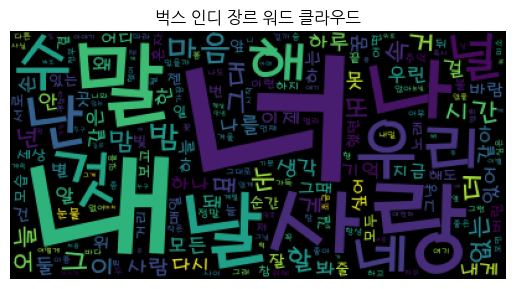

In [23]:
from wordcloud import WordCloud


wordcloud = WordCloud(
    font_path = "C:/Windows/Fonts/H2PORM.TTF"
).generate_from_frequencies(counter)

plt.imshow(wordcloud)
plt.title("벅스 인디 장르 워드 클라우드")
plt.axis("off")
plt.show()
